In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

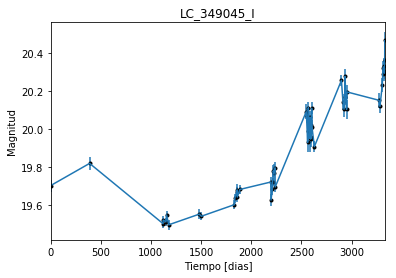

In [2]:
data = np.genfromtxt('LC_349045_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_349045_I')
plt.savefig("LC_349045_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

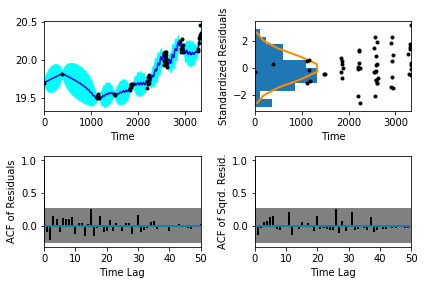

In [5]:
sample.assess_fit()

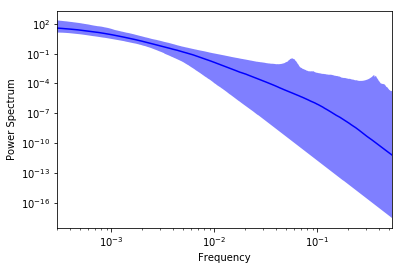

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

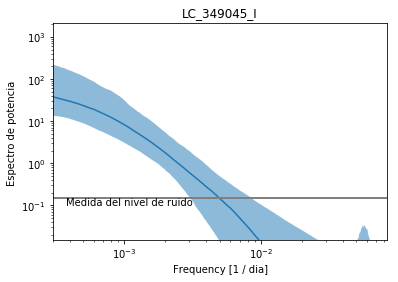

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_349045_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_349045_I')

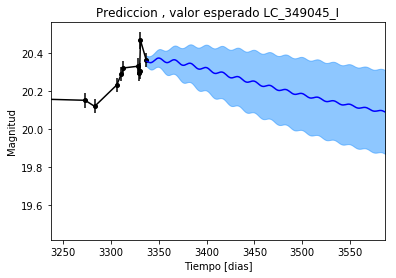

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_349045_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_349045_I')

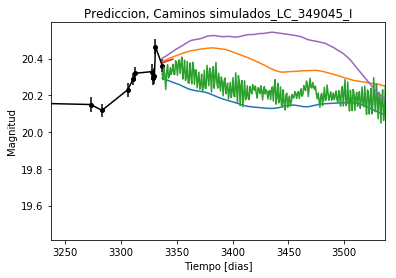

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_349045_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


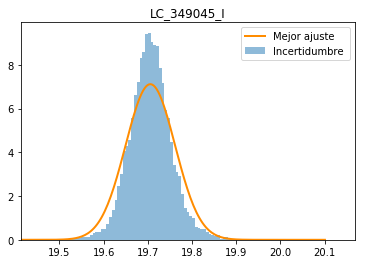

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_349045_I')
plt.savefig("Mejor_ajuste_LC_349045_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_349045_I')

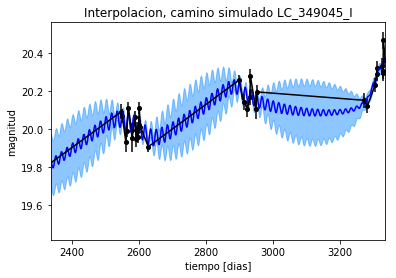

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_I')

Text(0.5,1,'Interpolacion, camino simulado LC_349045_I')

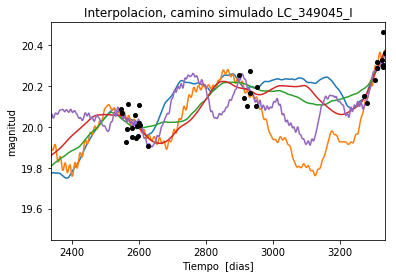

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_349045_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 608.191314326
Median: 0.00848737340193
Standard deviation: 0.186724476706
68% credibility interval: [ 0.00087824  0.13655444]
95% credibility interval: [  3.65881408e-04   7.79519419e-01]
99% credibility interval: [  3.07766669e-04   9.83928281e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 392.526527594
Median: 0.00204508817373
Standard deviation: 0.0598272405514
68% credibility interval: [ 0.00046805  0.01979697]
95% credibility interval: [ 0.00031682  0.15856745]
99% credibility interval: [  3.03727692e-04   4.61168354e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 274.902519808
Median: 0.0231062281789
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 206.180855731
Median: 79.8075016896
Standard deviation: 2.16890405764
68% credibility interval: [ 77.88002198  81.61909095]
95% credibility interval: [ 75.457588    84.88339532]
99% credibility interval: [ 73.48831335  85.53155631]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 506.118853502
Median: 0.629876143999
Standard deviation: 2.06686974975
68% credibility interval: [ 0.0525835   3.64977437]
95% credibility interval: [ 0.01358348  6.87971415]
99% credibility interval: [ 0.01202202  9.5474335 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 413.230696793
Median: 0.450389807634
Standard deviation: 9.43219118811
68% credibility interval: [ 0.03731731  9.30736418]
95% credibility interval: [  1.01554852e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17346.9292253
Median: 9.3650947635e-46
Standard deviation: 1.52771223976e+37
68% credibility interval: [  3.71964135e-85   1.57599948e-13]
95% credibility interval: [  7.87751170e-105   1.63588643e+001]
99% credibility interval: [  5.70204966e-107   4.73294361e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1629.15561004
Median: 19.8421197627
Standard deviation: 0.152898416196
68% credibility interval: [ 19.71800928  19.97274277]
95% credibility interval: [ 19.56013375  20.1665868 ]
99% credibility interval: [ 19.39867103  20.3752624 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 362.59176675
Median: 0.0533019577196
Standard deviation: 0.265389928128
68% credibility interval: [ 0.          0.38852124]
95% credibility interval: [ 0.         0.9433575]
99% credibility interval: [ 0.          1.03629729]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 362.59176675
Median: 0.0533019577196
Standard deviation: 0.265389928128
68% credibility interval: [ 0.          0.38852124]
95% credibility interval: [ 0.         0.9433575]
99% credibility interval: [ 0.          1.03629729]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 515.068298378
Median: 0.0
Standard deviation: 0.000183861090848
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 206.180855731
Median: 79.8075016896
Standard deviation: 2.16890405764
68% credibility interval: [ 77.88002198  81.61909095]
95% credibility interval: [ 75.457588    84.88339532]
99% credibility interval: [ 73.48831335  85.53155631]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1044.77729965
Median: 0.071000304307
Standard deviation: 0.105261902719
68% credibility interval: [ 0.04244045  0.1438361 ]
95% credibility interval: [ 0.02969837  0.3416645 ]
99% credibility interval: [ 0.0251878   0.68889527]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 317.392792555
Median: 1.50939034106
Standard deviation: 0.264517423247
68% credibility interval: [ 1.22140805  1.77180408]
95% credibility interval: [ 0.96105378  1.95685378]
99% credibility interval: [ 0.83722434  1.98964008]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 354.599134601
Median: 0.000336062361655
Standard deviation: 0.207576522302
68% credibility interval: [  1.11277735e-05   1.44367815e-02]
95% credibility interval: [  1.56934767e-07   4.52452654e-01]
99% credibility interval: [  3.13311484e-08   1.48137108e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 608.191314326
Median: (-0.0533277398556-0.362108659481j)
Standard deviation: 2.03887034024
68% credibility interval: [-0.85799686-0.308114j   -0.00551817-0.37318292j]
95% credibility interval: [ -4.89786496e+00+0.j          -2.29890068e-03-0.56741627j]
99% credibility interval: [ -6.18220372e+00+0.j          -1.93375501e-03-0.58164495j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 392.526527594
Median: (-0.0128496679651+2.69148496137j)
Standard deviation: 1.70933952541
68% credibility interval: [-0.12438803+0.25285411j -0.00294085+0.j        ]
95% credibility interval: [-0.99630865+0.65094133j -0.00199061+0.j        ]
99% credibility interval: [ -2.89760623e+00+5.00743077j  -1.90837737e-03+0.j        ]
Posterior sum